# Generate Heatmaps on Misclassified Images and Single Images by Filename

In [1]:
%matplotlib inline

### Start a CAS session

In [2]:
import swat
sess = swat.CAS(cashost, casport)

### Import Image Data

In [3]:
import dlpy
from dlpy.images import ImageTable


`img_path` should be a fully-qualified directory that is accessible by the CAS server session.
The folder structure is as follows:

   * Giraffe_Dolphin
       * Giraffe
           * Giraffe image 1
           * Girrafe image 2
           * ...
       * Dolphin
           * Dolphin image 1
           * Dolphin image 2
           * ...
           
We are using giraffe and dolphin images in this example.  Your case may differ.

In [4]:
img_path='/path/to/images/Giraffe_Dolphin'
my_images = ImageTable.load_files(sess, path=img_path)

In [5]:
my_images.image_summary

jpg                  2148
minWidth              170
maxWidth             1024
minHeight             127
maxHeight            1025
meanWidth         878.341
meanHeight         739.63
mean1stChannel    127.204
min1stChannel           0
max1stChannel         255
mean2ndChannel    125.531
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    103.978
min3rdChannel           0
max3rdChannel         255
dtype: object

#### Resize images to match model input

In [6]:
my_images.resize(width=224)

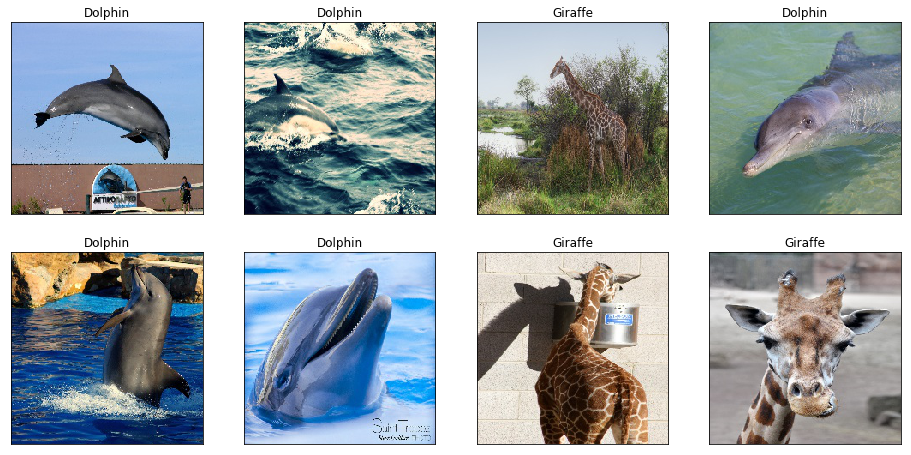

In [7]:
my_images.show(8, 4)

In [8]:
from dlpy.splitting import two_way_split

In [9]:
tr_img, te_img = two_way_split(my_images, test_rate=20, seed=123)
tr_img.label_freq

Frequency for IMAGEDATA_DB46GB

         Level  Frequency
Dolphin      1        757
Giraffe      2        962

### Reload a Model from a sashdat file

In [10]:
from dlpy import Model, Sequential
from dlpy.layers import * 
from dlpy.applications import *

In [11]:
model_r = Model(sess)
model_file = '/path/to/trained/model/Dol_Gir_CNN.sashdat'
model_r.load(path=model_file)

NOTE: Model table is loaded successfully!
NOTE: Model is renamed to "dol_gir_cnn" according to the model name in the table.
NOTE: Dol_Gir_CNN_weights.sashdat is used as model weigths.
NOTE: Model weights attached successfully!
NOTE: Dol_Gir_CNN_weights_attr.sashdat is used as weigths attribute.
NOTE: Model attributes attached successfully!


### Run Prediction on test images

In [12]:
model_r.predict(te_img)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           429
 1  Number of Observations Used           429
 2  Misclassification Error (%)      4.195804
 3                   Loss Error      0.149895

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(adstev)  Valid_Res_QO6XPm   429        9   
 
                                             casTable  
 0  CASTable('Valid_Res_QO6XPm', caslib='CASUSER(a...  

+ Elapsed: 1.01s, user: 45.1s, sys: 4.3s, mem: 3.57e+03mb

### Run heatmap on validation set containing correct and incorrect predections

#### When an ImageTable is passed to data the predictions are run again. To  avoid running again do not pass an ImageTable, the previously calculated results from model_r.predict(te_img) are used.


Running prediction ...
... finished running prediction
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_DGAZ5B contains compressed images.


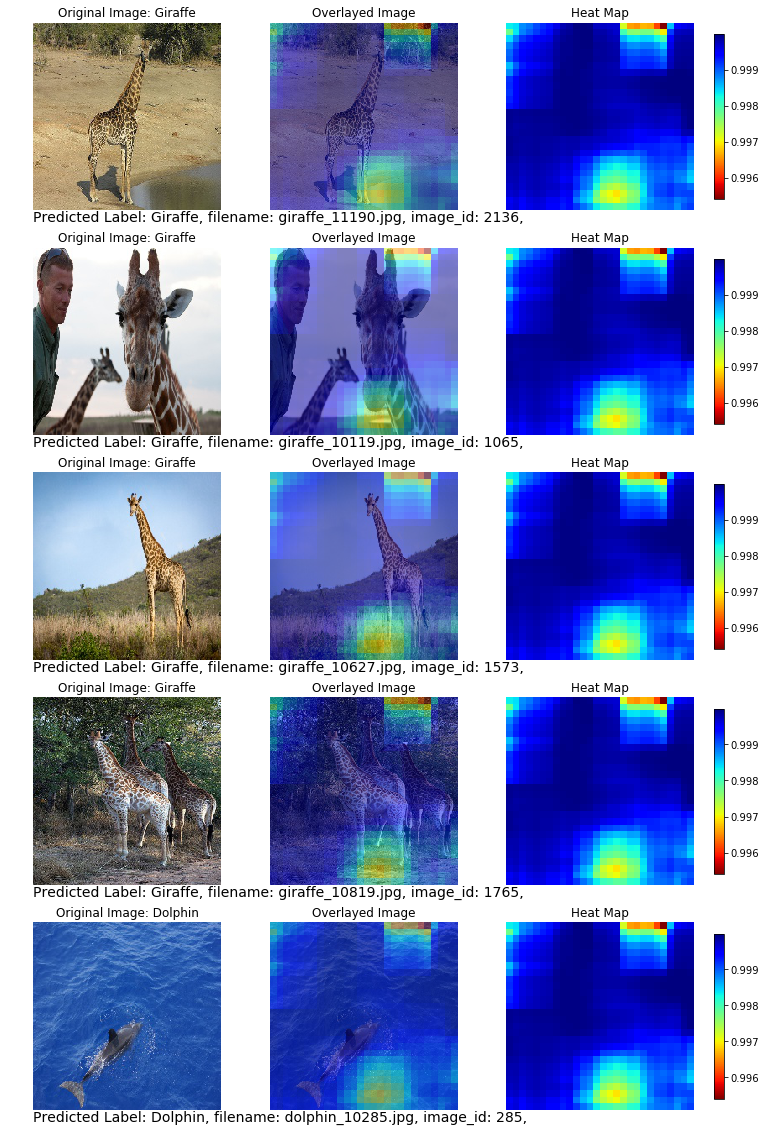

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe      1.134464e-07      9.999999e-01  giraffe_11190.jpg  2136   
1   Giraffe      1.635408e-03      9.983646e-01  giraffe_10119.jpg  1065   
2   Giraffe      5.135099e-05      9.999486e-01  giraffe_10627.jpg  1573   
3   Giraffe      7.996472e-03      9.920036e-01  giraffe_10819.jpg  1765   
4   Dolphin      9.999993e-01      6.823622e-07  dolphin_10285.jpg   285   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.9983365535736084, 0.9983365535736084, 0.99...  
1  [[0.9983365535736084, 0.9983365535736084, 0.99...  
2  [[0.9983365535736084, 0.9983365535736084, 0.99...  
3  [[0.9983365535736084, 0.9983365535736084, 0.99...  
4  [[0.9983365535736084, 0.9983365535736084, 0.99...

In [13]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, gpu=dict(devices=[0]))

#### Running heat_map_analysis without a data input avoids running the prediction calculations again

Using results from model.predict()
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_FPURWC contains compressed images.


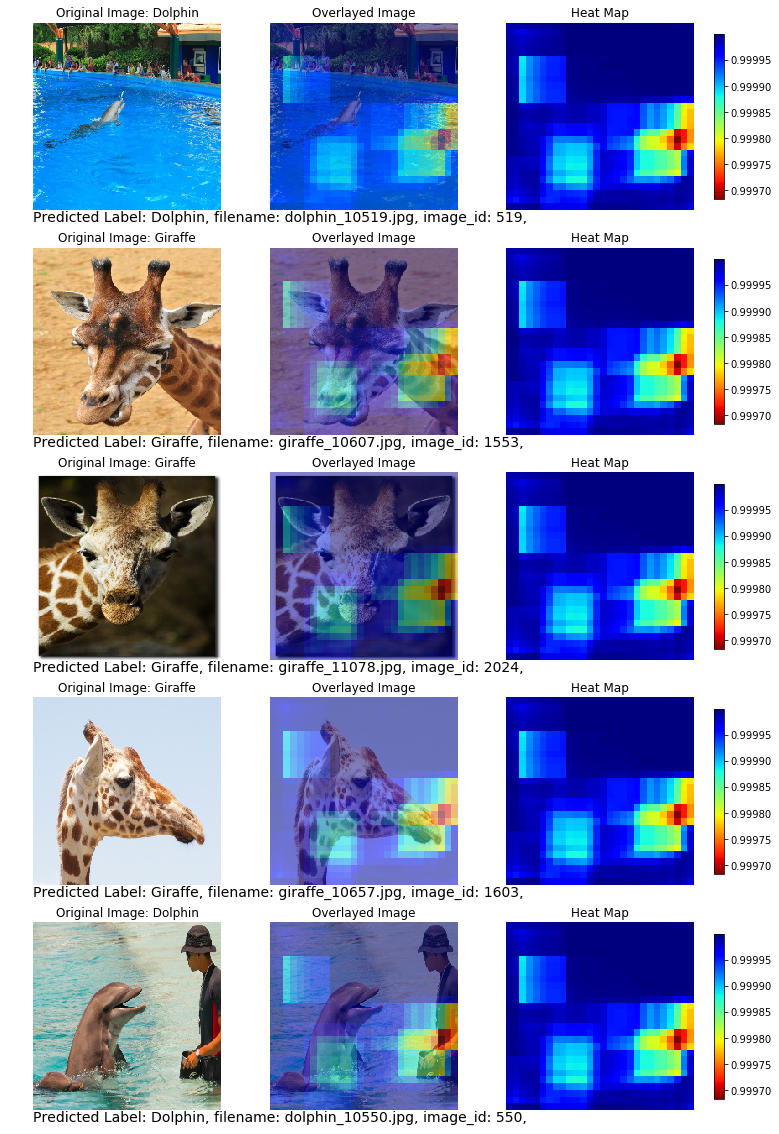

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin      9.999992e-01      7.846455e-07  dolphin_10519.jpg   519   
1   Giraffe      1.399114e-07      9.999999e-01  giraffe_10607.jpg  1553   
2   Giraffe      1.416125e-06      9.999986e-01  giraffe_11078.jpg  2024   
3   Giraffe      2.740860e-04      9.997259e-01  giraffe_10657.jpg  1603   
4   Dolphin      9.918323e-01      8.167721e-03  dolphin_10550.jpg   550   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.9999861717224121, 0.9999861717224121, 0.99...  
1  [[0.9999861717224121, 0.9999861717224121, 0.99...  
2  [[0.9999861717224121, 0.9999861717224121, 0.99...  
3  [[0.9999861717224121, 0.9999861717224121, 0.99...  
4  [[0.9999861717224121, 0.9999861717224121, 0.99...

In [14]:
model_r.heat_map_analysis(mask_width=56, mask_height=56, step_size=8)

### Most of these heatmaps are correct classifications, lets see some heatmaps of misclassifications

Use the img_type parameter to 'M' misclassified, 'C' correct classification, or 'A' for all

Running prediction ...
... finished running prediction
NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table SAMPLE_TBL_UHHWPB contains compressed images.


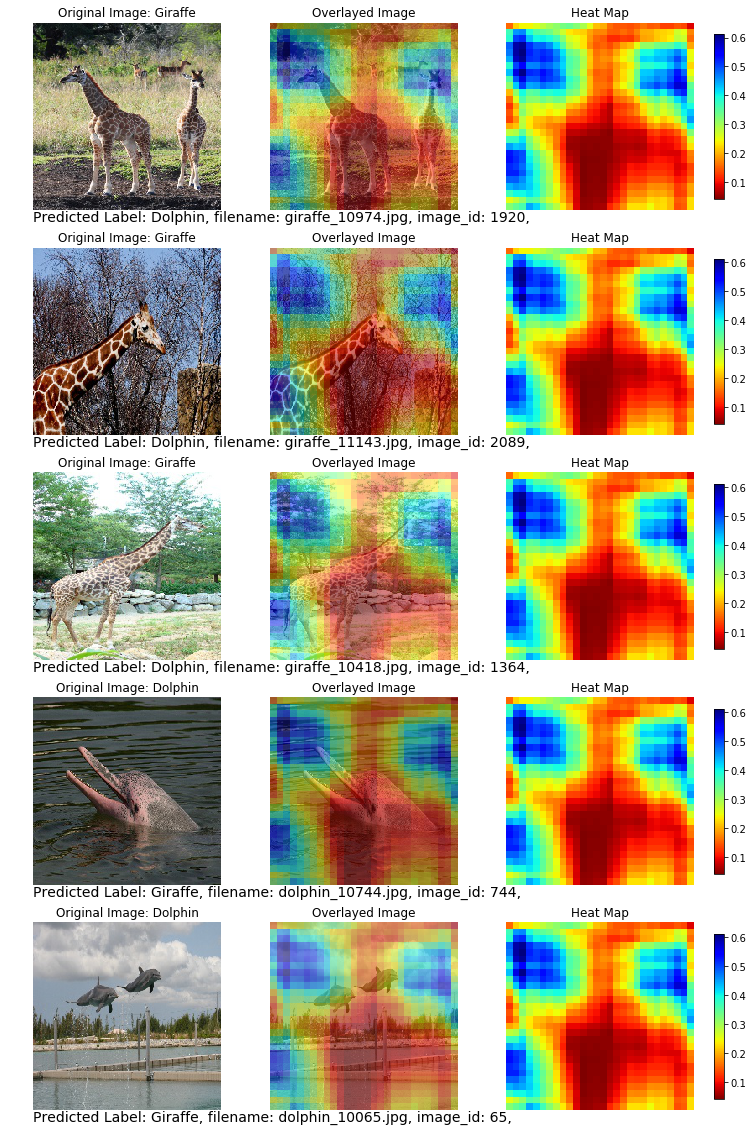

In [18]:
misclass = model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='M')

In [19]:
misclass

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin          0.832112          0.167888  giraffe_10974.jpg  1920   
1   Dolphin          0.991168          0.008832  giraffe_11143.jpg  2089   
2   Dolphin          0.998275          0.001725  giraffe_10418.jpg  1364   
3   Giraffe          0.013359          0.986641  dolphin_10744.jpg   744   
4   Giraffe          0.000102          0.999898  dolphin_10065.jpg    65   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.1582726687192917, 0.1582726687192917, 0.15...  
1  [[0.1582726687192917, 0.1582726687192917, 0.15...  
2  [[0.1582726687192917, 0.1582726687192917, 0.15...  
3  [[0.1582726687192917, 0.1582726687192917, 0.15...  
4  [[0.1582726687192917, 0.1582726687192917, 0.15...

### Perhaps you want to only observe the heatmaps of specific images by _filename_0
You can pass a single filename or a list of filenames

In [20]:
misclass['_filename_0'].tolist()

['giraffe_10974.jpg',
 'giraffe_11143.jpg',
 'giraffe_10418.jpg',
 'dolphin_10744.jpg',
 'dolphin_10065.jpg']

In [21]:
two_misclass_names = misclass['_filename_0'].tolist()[:2]

In [22]:
two_misclass_names

['giraffe_10974.jpg', 'giraffe_11143.jpg']

Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_WBKSFA contains compressed images.


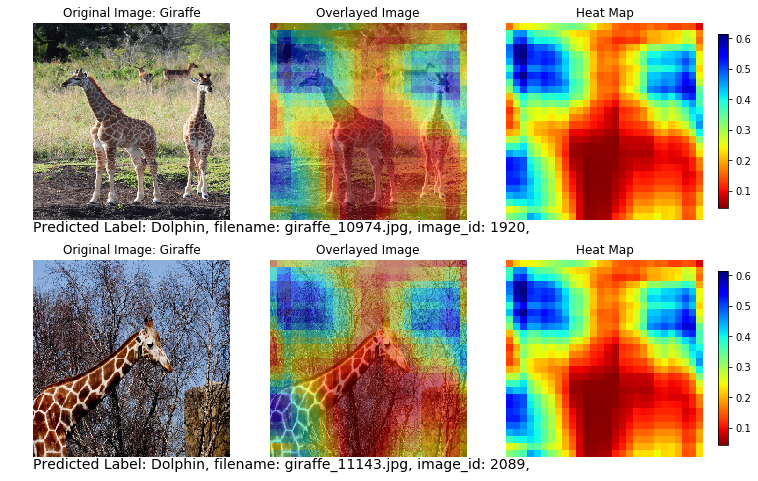

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Dolphin          0.832116          0.167884  giraffe_10974.jpg  1920   
1   Dolphin          0.991168          0.008832  giraffe_11143.jpg  2089   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   

                                            heat_map  
0  [[0.1582726687192917, 0.1582726687192917, 0.15...  
1  [[0.1582726687192917, 0.1582726687192917, 0.15...

In [23]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', filename = two_misclass_names)

### Filenames are not necessarily unique so use the image_id of the images found in the _id_ column

If both the image_id and filename parameter are passed the image_id superscedes filename because image_is unique

In [24]:
my_list = te_img['_id_'].tolist()[:4]

In [25]:
my_list

[435, 285, 962, 1362]

Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_WMBYIE contains compressed images.


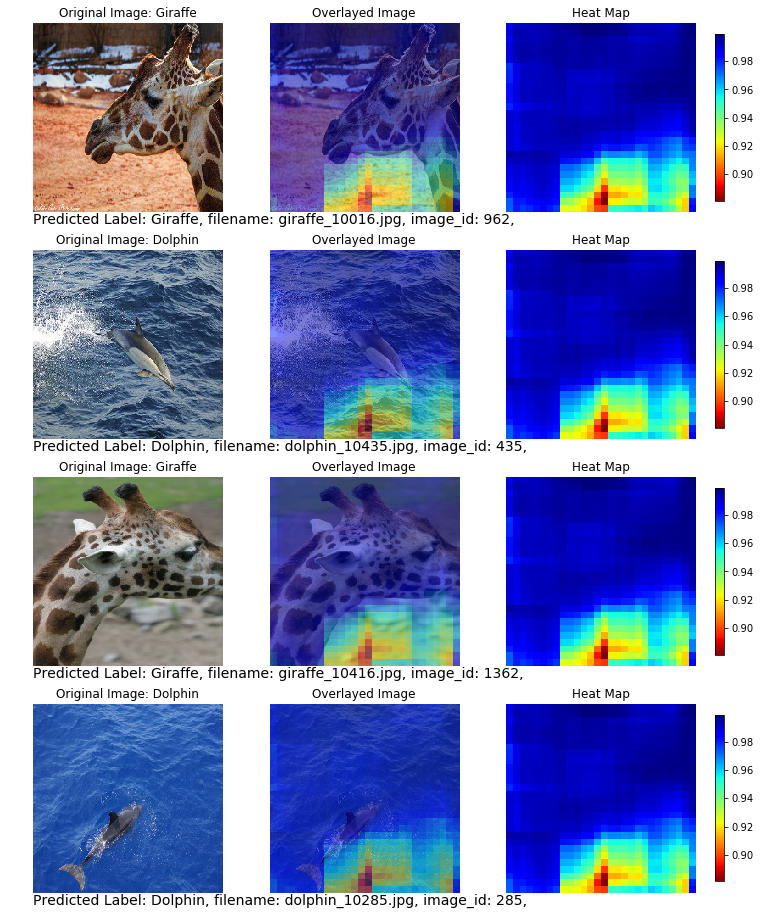

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0  _id_  \
0   Giraffe          0.000002      9.999985e-01  giraffe_10016.jpg   962   
1   Dolphin          0.999998      1.685093e-06  dolphin_10435.jpg   435   
2   Giraffe          0.004012      9.959876e-01  giraffe_10416.jpg  1362   
3   Dolphin          0.999999      6.823597e-07  dolphin_10285.jpg   285   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Giraffe   
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.9871379137039185, 0.9871379137039185, 0.98...  
1  [[0.9871379137039185, 0.9871379137039185, 0.98...  
2  [[0.9871379137039185, 0.9871379137039185, 0.98...  
3  [[0.9871379137039185, 0.9871379137039185, 0.98...

In [26]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = my_list)

In [27]:
my_list[0]

435

In [28]:
single = my_list[0]

#### Or a single image id

Running prediction ...
... finished running prediction
NOTE: Table VALID_RES_COMPLETE_M3CJTV contains compressed images.


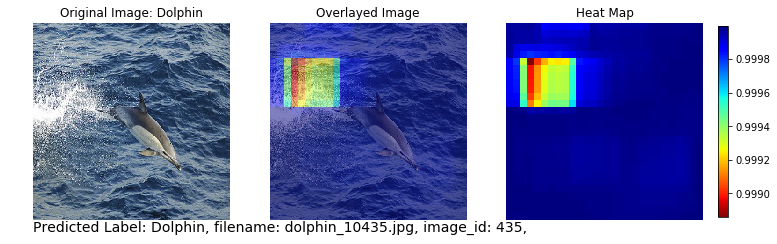

I__label_  P__label_Dolphin  P__label_Giraffe        _filename_0 _id_  \
0   Dolphin          0.999998          0.000002  dolphin_10435.jpg  435   

                                             _image_  _label_  \
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  Dolphin   

                                            heat_map  
0  [[0.9999704360961914, 0.9999704360961914, 0.99...

In [29]:
model_r.heat_map_analysis(data=te_img, mask_width=56, mask_height=56, step_size=8, img_type='A', image_id = single, gpu=dict(devices=[0]))